Running experiments for TSP Problem...
The best fitness for trial  0   12.830951040632222
The best fitness for trial  1   15.876254362985375
The best fitness for trial  2   15.14552275229412
The best fitness for trial  3   17.685065660668908
The best fitness for trial  4   19.69540829534734
Iteration Count (21, 2)
The best fitness for trial  0   12.202400490722702
The best fitness for trial  1   14.695225580994357
The best fitness for trial  2   13.833048461124646
The best fitness for trial  3   12.397883975153055
The best fitness for trial  4   13.064697306262591
Iteration Count (63, 2)
The best fitness for trial  0   12.8723260831056
The best fitness for trial  1   11.631152622516542
The best fitness for trial  2   11.17838320795368
The best fitness for trial  3   10.261892041377765
The best fitness for trial  4   13.661651416922211
Iteration Count (66, 2)


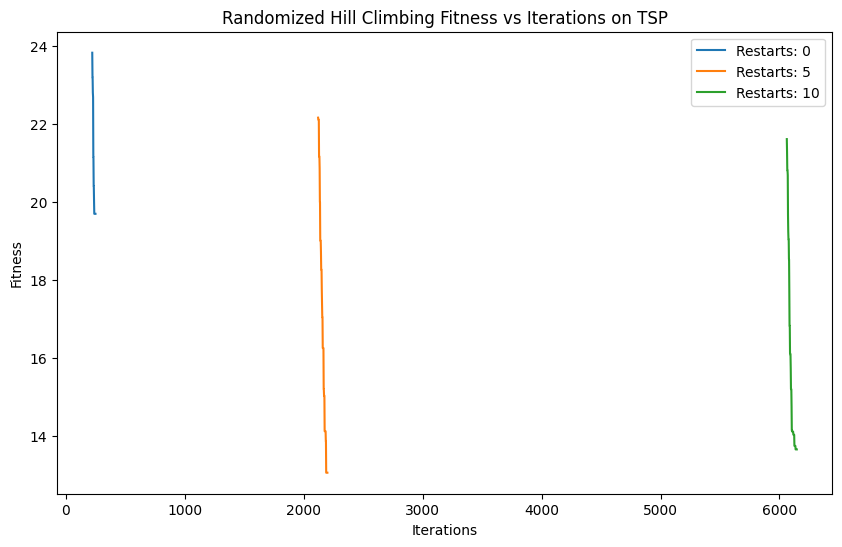

The best fitness for trial  0   15.196448740871535
The best fitness for trial  1   12.729773465230622
The best fitness for trial  2   12.877415557875695
The best fitness for trial  3   14.752894093470575
The best fitness for trial  4   12.203673080890113
Iteration Count (761, 2)
The best fitness for trial  0   12.93915351389582
The best fitness for trial  1   11.033162698490832
The best fitness for trial  2   14.439606565569896
The best fitness for trial  3   13.56945676074033
The best fitness for trial  4   13.416178064994414
Iteration Count (333, 2)
The best fitness for trial  0   14.296674445554421
The best fitness for trial  1   13.899573995182585
The best fitness for trial  2   12.79106397697785
The best fitness for trial  3   13.712880600059863
The best fitness for trial  4   12.439711804334841
Iteration Count (191, 2)


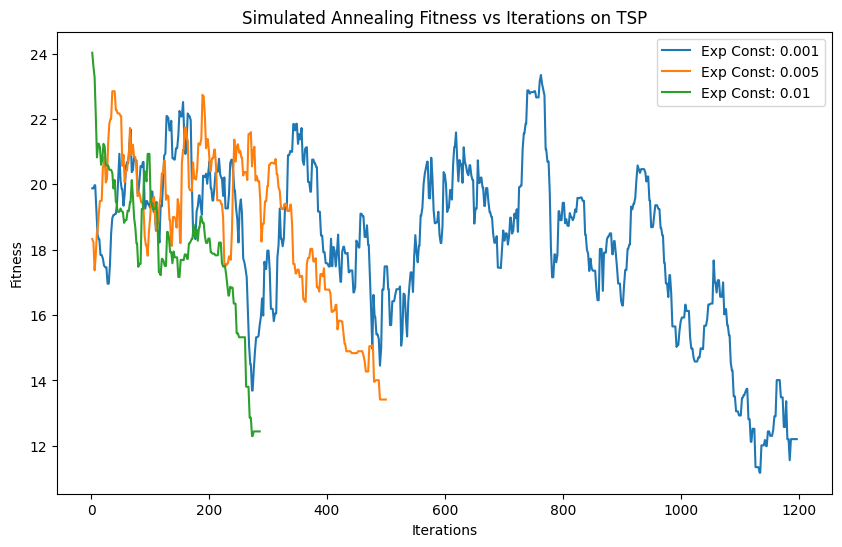

The best fitness for trial  0   8.349156542779829
The best fitness for trial  1   9.201921920041633
The best fitness for trial  2   8.948160465725456
The best fitness for trial  3   8.717711010298352
The best fitness for trial  4   6.943099469043544
Iteration Count (91, 2)
The best fitness for trial  0   7.273326032262561
The best fitness for trial  1   6.0518174144234065
The best fitness for trial  2   7.608028936672109
The best fitness for trial  3   6.228370627295898
The best fitness for trial  4   6.510958983368682
Iteration Count (119, 2)
The best fitness for trial  0   9.28043560791987
The best fitness for trial  1   5.699033638847074
The best fitness for trial  2   5.3046938749198995
The best fitness for trial  3   5.157976681285323
The best fitness for trial  4   5.756263495112428
Iteration Count (94, 2)


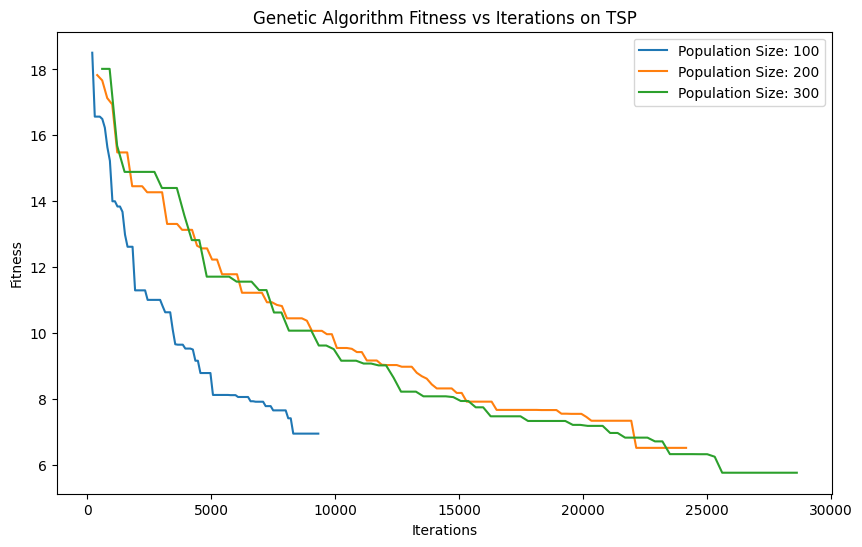

The best fitness for trial  0   19.829046578456218
The best fitness for trial  1   18.665374383690565
The best fitness for trial  2   18.37083961387264
The best fitness for trial  3   17.439782065014594
The best fitness for trial  4   19.056864864767626
Iteration Count (11, 2)
The best fitness for trial  0   18.14911020333921
The best fitness for trial  1   13.467160405111889
The best fitness for trial  2   14.509208165169284
The best fitness for trial  3   16.91648856227429
The best fitness for trial  4   15.735569230465428
Iteration Count (14, 2)
The best fitness for trial  0   10.748508642187682
The best fitness for trial  1   11.463536548202825
The best fitness for trial  2   14.560246526206575
The best fitness for trial  3   16.745993938208276
The best fitness for trial  4   12.519445035201265
Iteration Count (22, 2)


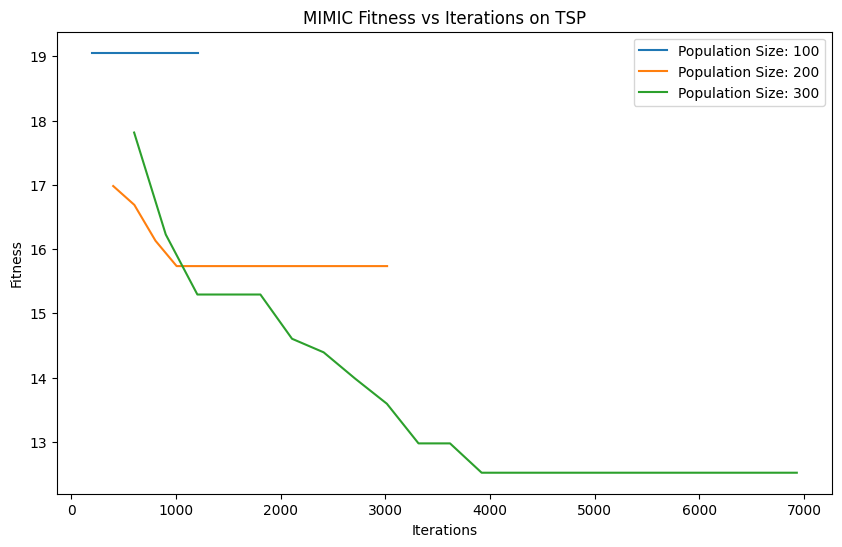

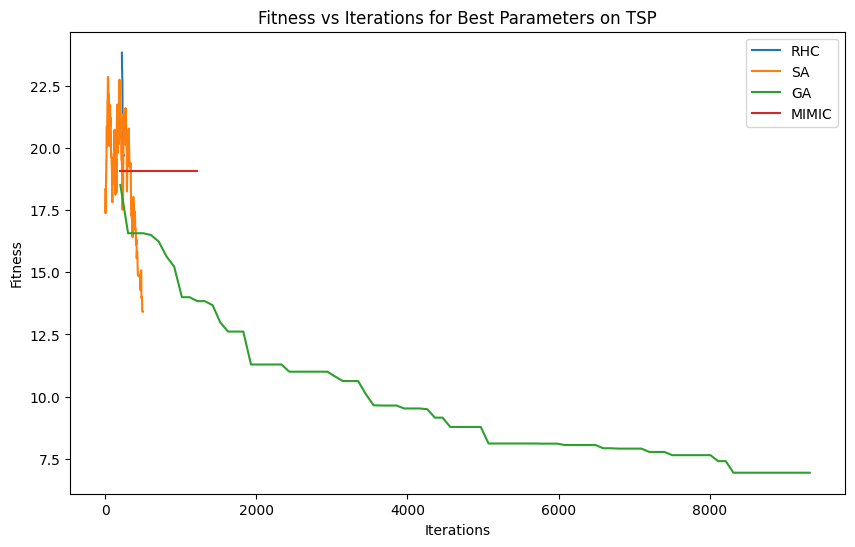

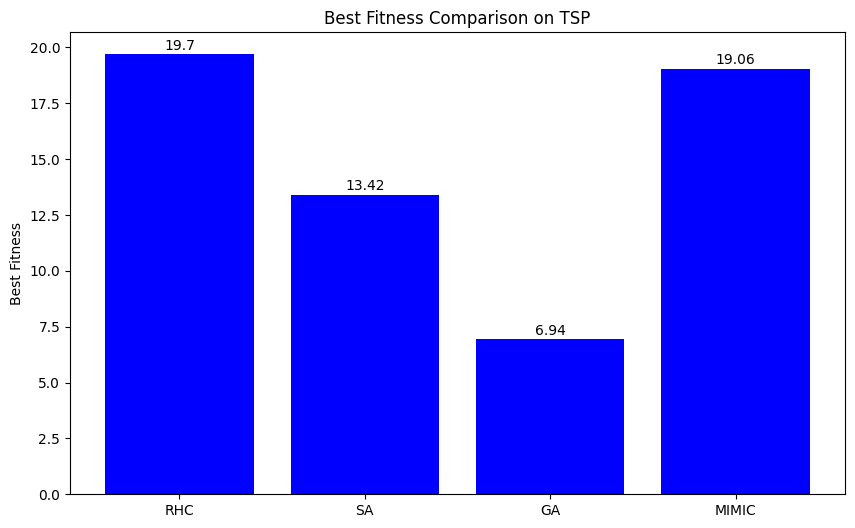

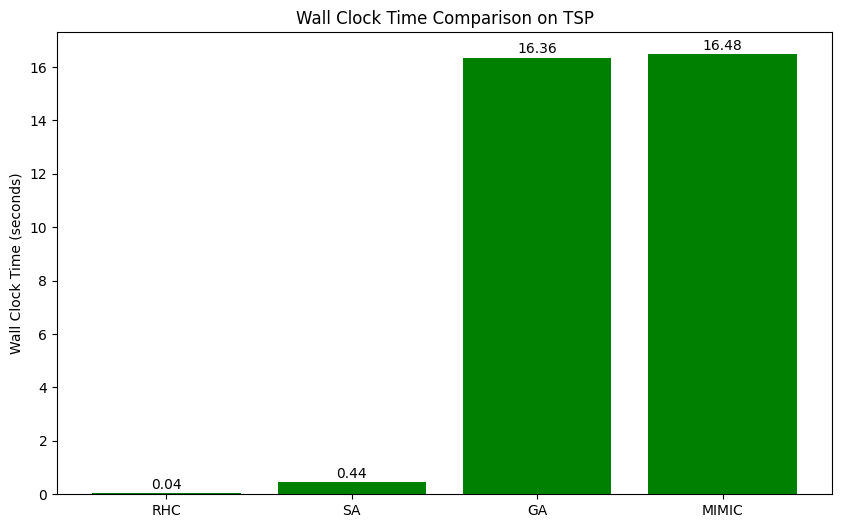

In [1]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import random
from util import plot_fitness_vs_iterations, plot_best_algorithms, run_experiment

np.random.seed(42)

# Traveling Salesman Problem
def tsa():
    # Distance Based
    random.seed(42)
    dist_list = []
    cities = 50
    for x in range(cities):
        for y in range(cities):
            random.seed(x + y)
            dist_list.append((x, y, random.uniform(0.0, 1.0)))
            
    radius = 1
    rangeX = (0, 10)
    rangeY = (0, 10)
    qty = 20  # or however many points you want

    deltas = set()
    for x in range(-radius, radius+1):
        for y in range(-radius, radius+1):
            if x*x + y*y <= radius*radius:
                deltas.add((x,y))

    randPoints = []
    excluded = set()
    i = 0
    while i<qty:
        x = random.randrange(*rangeX)
        y = random.randrange(*rangeY)
        if (x,y) in excluded: continue
        randPoints.append((x,y))
        i += 1
        excluded.update((x+dx, y+dy) for (dx,dy) in deltas)
        
    fitness_dists = mlrose.TravellingSales(distances = dist_list)
    problem = mlrose.TSPOpt(length = cities, fitness_fn = fitness_dists, maximize = False)
    return problem

def tsa_experiment():
    # Define the optimization problem object
    problem = tsa()

    # Test parameters
    restarts = [0, 5, 10]  # for RHC
    exp_consts = [0.001, 0.005, 0.01]  # for SA
    pop_sizes = [100, 200, 300]  # for GA and MIMIC

    # Run experiments
    print("Running experiments for TSP Problem...")

    # Randomized Hill Climbing
    rhc_curve, rhc_best_curve, rhc_best_fitness, rhc_times = run_experiment(problem, 'rhc', restarts, 'Restarts')
    plot_fitness_vs_iterations("TSP", "Randomized Hill Climbing", rhc_curve, 'Restarts', restarts)

    # Simulated Annealing
    sa_curve, sa_best_curve, sa_best_fitness, sa_times = run_experiment(problem, 'sa', exp_consts, 'Exp Const')
    plot_fitness_vs_iterations("TSP", "Simulated Annealing", sa_curve, 'Exp Const', exp_consts)

    # Genetic Algorithm
    ga_curve, ga_best_curve, ga_best_fitness, ga_times = run_experiment(problem, 'ga', pop_sizes, 'Population Size')
    plot_fitness_vs_iterations("TSP", "Genetic Algorithm", ga_curve, 'Population Size', pop_sizes)

    # MIMIC
    mimic_curve, mimic_best_curve, mimic_best_fitness, mimic_times = run_experiment(problem, 'mimic', pop_sizes, 'Population Size')
    plot_fitness_vs_iterations("TSP", "MIMIC", mimic_curve, 'Population Size', pop_sizes)

    # Compare the best parameters from each algorithm
    best_fitnesses = [max(rhc_best_fitness), max(sa_best_fitness), max(ga_best_fitness), max(mimic_best_fitness)]
    best_times = [min(rhc_times), min(sa_times), min(ga_times), min(mimic_times)]
    best_fitness_curves = [rhc_best_curve, sa_best_curve, ga_best_curve, mimic_best_curve]
    algorithms = ['RHC', 'SA', 'GA', 'MIMIC']

    plot_best_algorithms("TSP", best_fitnesses, algorithms, best_times, best_fitness_curves)



tsa_experiment()